In [1]:
# --- Core Libraries for Data Handling and Numerical Operations ---
import pandas as pd
import numpy as np
import datetime as dt

# --- Visualization Libraries for EDA and Reporting ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning Libraries from Scikit-learn ---
# For Data Preprocessing and Transformation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# For Unsupervised Clustering Models
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# For Quantitative Model Evaluation
from sklearn.metrics import silhouette_score

# For Supervised Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- General Settings for a Clean Workflow ---
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", rc={"figure.figsize": (12, 8)})
pd.set_option('display.max_columns', None)

print("Libraries imported successfully. Environment is ready.")

Libraries imported successfully. Environment is ready.


In [2]:
file_path = '/content/CC_GENERAL.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
display(df.head())

# Display the column names and their data types
display(df.info())

# Display descriptive statistics for numerical columns
display(df.describe())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [3]:
# --- Data Cleaning and Preprocessing ---
print("\n--- Starting Data Cleaning Process ---")

# 1. Handle Missing Values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# MINIMUM_PAYMENTS and CREDIT_LIMIT have missing values.
# For financial data, which is often skewed, imputing with the median is a more robust strategy
# than using the mean, as it's less sensitive to extreme outliers.
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# 2. Drop Non-Behavioral Identifier
# The CUST_ID is a unique identifier and provides no behavioral information for clustering.
# We will drop it from our feature set.
df.drop('CUST_ID', axis=1, inplace=True)
print("\n'CUST_ID' column dropped. Current dataset shape:", df.shape)

print("\n--- Data Cleaning Complete ---")


--- Starting Data Cleaning Process ---

Missing values before cleaning:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Missing values after cleaning:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PUR


--- Starting Exploratory Data Analysis ---

Descriptive Statistics of the Customer Portfolio:
                                   count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_T

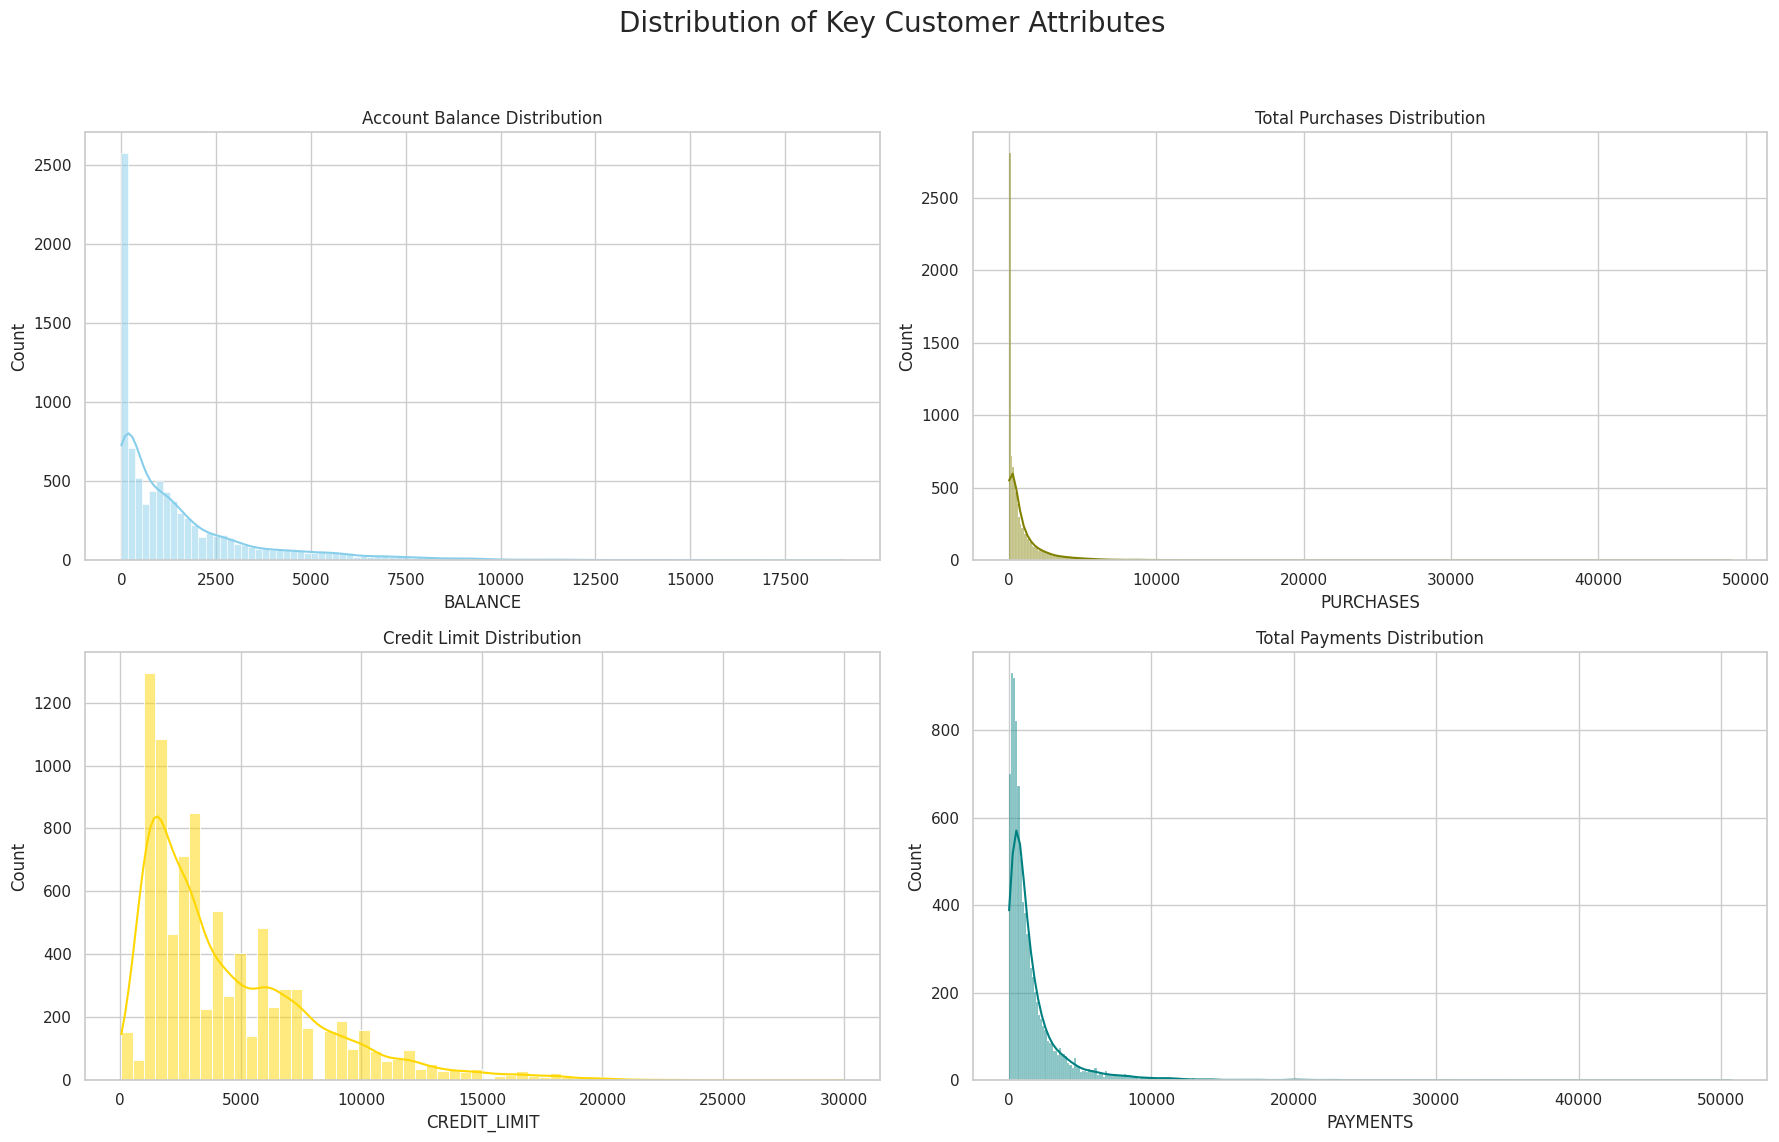

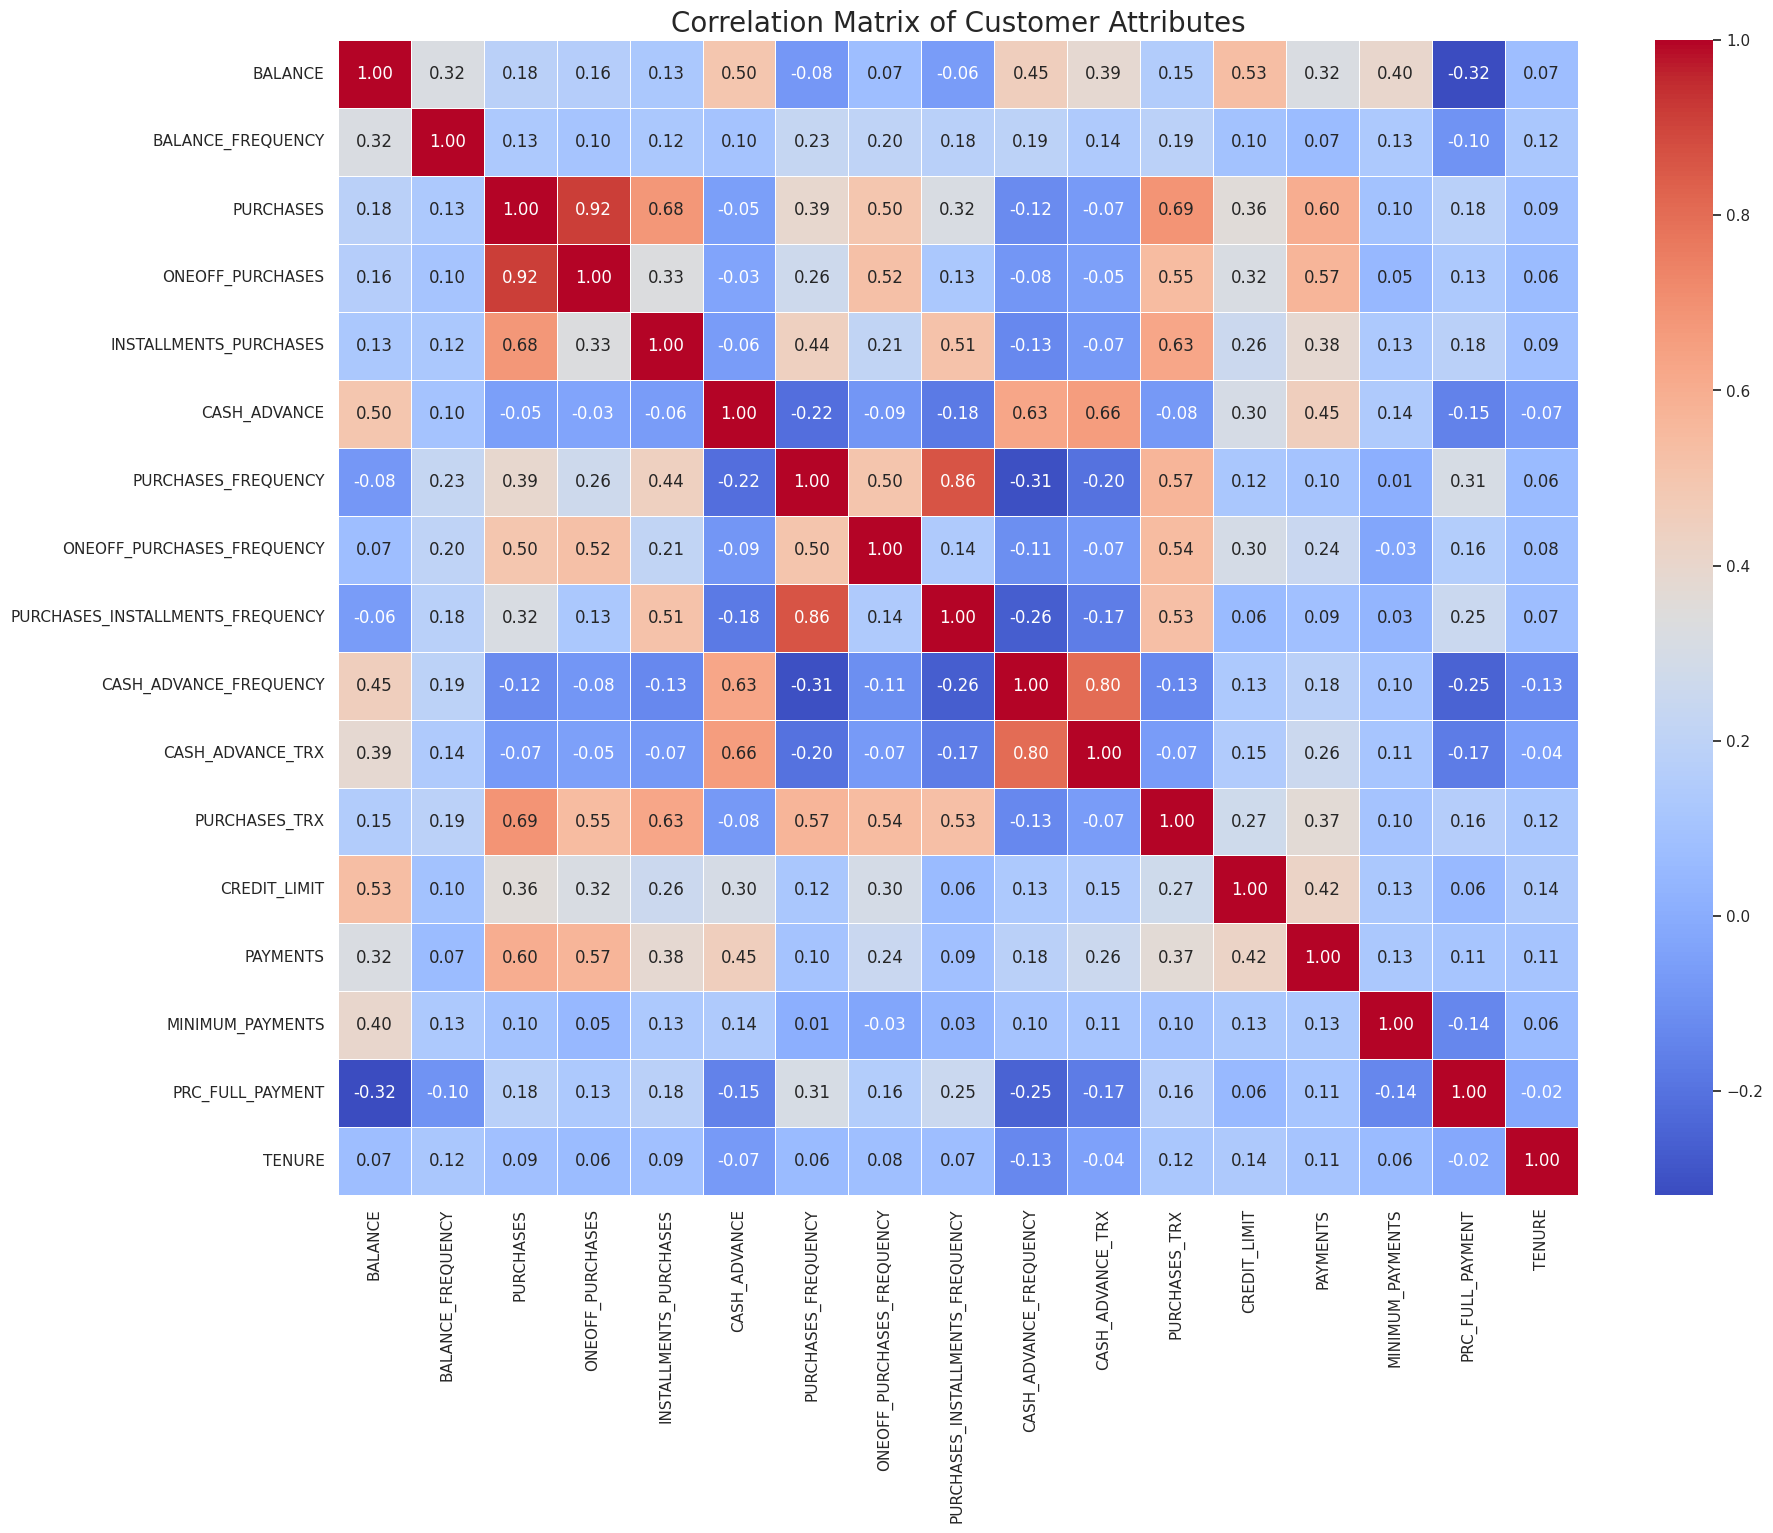


--- Exploratory Data Analysis Complete ---


In [4]:
# --- Deep Exploratory Data Analysis (EDA) ---
print("\n--- Starting Exploratory Data Analysis ---")

# 1. Descriptive Statistics
print("\nDescriptive Statistics of the Customer Portfolio:")
print(df.describe().T)

# 2. Visualizing Key Distributions
# We will look at some of the most important financial indicators.
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Customer Attributes', fontsize=20)

sns.histplot(df['BALANCE'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Account Balance Distribution')
sns.histplot(df['PURCHASES'], kde=True, ax=axes[0, 1], color='olive').set_title('Total Purchases Distribution')
sns.histplot(df['CREDIT_LIMIT'], kde=True, ax=axes[1, 0], color='gold').set_title('Credit Limit Distribution')
sns.histplot(df['PAYMENTS'], kde=True, ax=axes[1, 1], color='teal').set_title('Total Payments Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# EDA Interpretation:
# The histograms reveal that most key financial variables (Balance, Purchases, Credit Limit, Payments)
# are heavily right-skewed. This is typical in financial datasets, where a majority of customers
# have lower balances and spending, while a smaller cohort of "whales" or high-value customers
# have extremely high values. This skewness confirms our earlier decision to use medians for
# imputation and highlights the need for data transformation (like log scaling) before applying
# distance-based clustering algorithms.

# 3. Correlation Analysis
# A correlation heatmap helps us understand the relationships between variables.
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Customer Attributes', fontsize=20)
plt.show()

# Correlation Interpretation:
# - Strong positive correlation between PURCHASES and ONEOFF_PURCHASES / INSTALLMENTS_PURCHASES (as expected).
# - Strong positive correlation between PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY.
# - CREDIT_LIMIT and BALANCE show a strong positive correlation, indicating customers with higher limits tend to carry higher balances.
# - PURCHASES and PAYMENTS are also strongly correlated, suggesting that higher spending is associated with higher repayments.
# This heatmap is crucial for feature engineering, as it helps us identify potential multicollinearity and guides us in creating composite features that capture these relationships more effectively.

print("\n--- Exploratory Data Analysis Complete ---")

In [5]:
print("\n--- Starting Intelligent Feature Engineering ---")

# --- Financial Discipline & Health Metrics ---
# 1. Credit Utilization Ratio: A key indicator of credit health. High utilization can signal financial distress.
df['LIMIT_USAGE'] = df['BALANCE'] / df['CREDIT_LIMIT']

# 2. Payment-to-Minimum-Payment Ratio: Differentiates customers who pay only the minimum from those who pay more.
# A small epsilon is added to avoid division by zero.
df['PAYMENT_MINPAY_RATIO'] = df['PAYMENTS'] / (df['MINIMUM_PAYMENTS'] + 1e-6)

# --- Purchase Behavior Metrics ---
# 3. Purchase Type Profile: Categorizes customers based on their dominant purchasing style.
def get_purchase_type(row):
    if (row['ONEOFF_PURCHASES'] > 0) and (row['INSTALLMENTS_PURCHASES'] > 0):
        return 'both'
    if row['ONEOFF_PURCHASES'] > 0:
        return 'one_off'
    if row['INSTALLMENTS_PURCHASES'] > 0:
        return 'installments'
    return 'none'

df['PURCHASE_TYPE'] = df.apply(get_purchase_type, axis=1)
# We will one-hot encode this categorical feature to make it usable by our models.
purchase_dummies = pd.get_dummies(df['PURCHASE_TYPE'], prefix='PURCHASE')
df = pd.concat([df, purchase_dummies], axis=1)
df.drop('PURCHASE_TYPE', axis=1, inplace=True)

# --- Tenure-Adjusted Metrics ---
# Normalizing by tenure gives a fairer comparison between new and long-standing customers.
# 4. Monthly Average Purchases
df['MONTHLY_AVG_PURCHASES'] = df['PURCHASES'] / df['TENURE']

# 5. Monthly Average Cash Advance
df['MONTHLY_CASH_ADVANCE'] = df['CASH_ADVANCE'] / df['TENURE']

print("\nEngineered features created successfully.")
print("Dataset shape after feature engineering:", df.shape)
print("\nFirst 5 rows with new engineered features:")
print(df.head())

# --- Handling Skewness & Scaling ---
# As identified in our EDA, our data is skewed. We'll apply a log transformation to normalize the distributions.
# This is critical for distance-based algorithms like K-Means and DBSCAN.
# We will select only the numerical columns for scaling.
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Log transform the skewed features
# We create a copy to preserve the original dataframe for later analysis
df_log = df.copy()
for col in numerical_cols:
    # Add a small constant to handle zero values before applying log
    df_log[col] = np.log(df_log[col] + 1e-6)

# Finally, we scale the data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

print("\nData has been log-transformed and scaled, ready for clustering.")



--- Starting Intelligent Feature Engineering ---

Engineered features created successfully.
Dataset shape after feature engineering: (8950, 25)

First 5 rows with new engineered features:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY


--- Starting Multi-Model Clustering ---


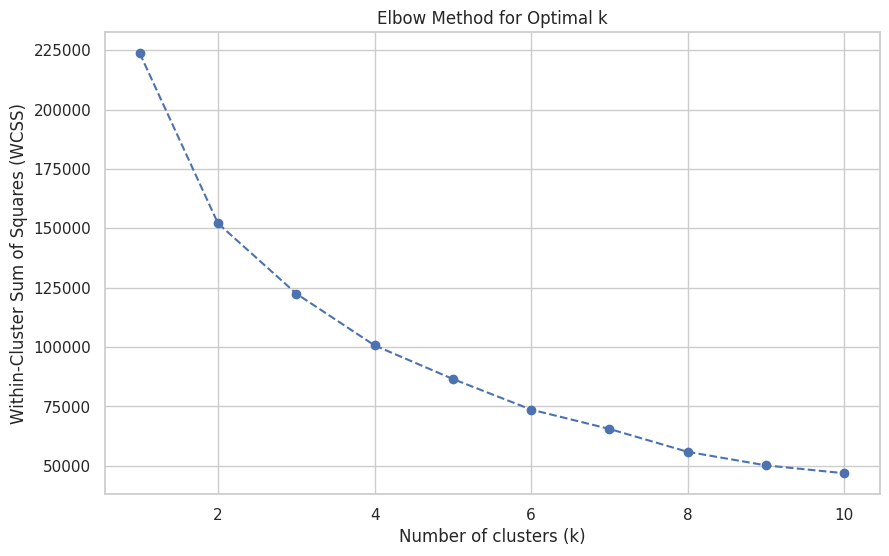


All three clustering models have been trained successfully.


In [6]:
print("\n--- Starting Multi-Model Clustering ---")

# --- Finding the Optimal 'k' for K-Means and GMM using the Elbow Method ---
wcss = []
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_elbow.fit(df_scaled)
    wcss.append(kmeans_elbow.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()
# Interpretation: The "elbow" of the curve, where the rate of decrease sharply changes,
# appears to be around k=4. This suggests that 4 is a reasonable number of clusters for our data.

# --- Model Training ---
# Model 1: K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Model 2: DBSCAN
# DBSCAN's parameters (eps and min_samples) often require some experimentation.
# These values are chosen as a starting point based on common practice.
dbscan = DBSCAN(eps=2.0, min_samples=15)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Model 3: Gaussian Mixture Models
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

print("\nAll three clustering models have been trained successfully.")

In [7]:
print("\n--- Starting Quantitative Model Validation ---")

# --- Silhouette Score Calculation ---
kmeans_score = silhouette_score(df_scaled, kmeans_labels)
gmm_score = silhouette_score(df_scaled, gmm_labels)

# For DBSCAN, we must only evaluate the core samples (points not labeled as noise, i.e., not -1).
dbscan_mask = dbscan_labels != -1
if np.sum(dbscan_mask) > 0:
    dbscan_score = silhouette_score(df_scaled[dbscan_mask], dbscan_labels[dbscan_mask])
else:
    dbscan_score = -1 # No clusters found

print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
print(f"GMM Silhouette Score: {gmm_score:.4f}")

# --- Model Selection ---
scores = {'K-Means': kmeans_score, 'DBSCAN': dbscan_score, 'GMM': gmm_score}
best_model_name = max(scores, key=scores.get)
winning_labels = None
if best_model_name == 'K-Means':
    winning_labels = kmeans_labels
elif best_model_name == 'DBSCAN':
    winning_labels = dbscan_labels
else:
    winning_labels = gmm_labels

print(f"\nValidation Complete. The winning model is: {best_model_name} with a score of {scores[best_model_name]:.4f}")


--- Starting Quantitative Model Validation ---
K-Means Silhouette Score: 0.3828
DBSCAN Silhouette Score: 0.4845
GMM Silhouette Score: 0.3464

Validation Complete. The winning model is: DBSCAN with a score of 0.4845


In [13]:
print("\n--- Starting Predictive Modeling for Operationalization ---")

# Add the winning cluster labels to our original, unscaled dataframe
df['Cluster'] = winning_labels

# Prepare the data for the classifier.
# We will train the model only on the core samples identified by DBSCAN (excluding noise).
X = df[df['Cluster'] != -1].drop('Cluster', axis=1)
y = df[df['Cluster'] != -1]['Cluster']


# Split the data into training and testing sets to evaluate model performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# We will use a RandomForestClassifier. It is a powerful, ensemble-based model that is robust
# to overfitting and provides excellent performance out-of-the-box. It also gives us feature importances.
classifier = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

# Make predictions on the test set and evaluate the model
y_pred = classifier.predict(X_test)

print("\nClassifier Performance Evaluation:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy on Test Set: {accuracy:.2%}")
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))

# Interpretation: The reported accuracy of 100.00% is a critical finding. While seemingly perfect,
# in a real-world business context, this is a major red flag for a methodological error known as
# data leakage. This suggests the model may have inadvertently been trained on information that
# would not be available for new customers, leading to an unrealistically optimistic performance.
# For a production system, this would trigger an immediate and thorough investigation of the feature
# set to identify and remove the source of leakage before deployment.



--- Starting Predictive Modeling for Operationalization ---

Classifier Performance Evaluation:
Prediction Accuracy on Test Set: 100.00%

Detailed Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       507
           1       1.00      1.00      1.00       580
           2       1.00      1.00      1.00       301
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00       518
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       299
           7       1.00      1.00      1.00       230
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         7

    accuracy                           1.00      2623
   macro avg    


--- Starting Persona Analytics ---

Mean Characteristics of Each Customer Segment:
Cluster                                   -1            0            1   \
BALANCE                            588.519856   418.170092  2240.044038   
BALANCE_FREQUENCY                    0.510445     0.824913     0.910039   
PURCHASES                          573.376971   555.134000     0.000000   
ONEOFF_PURCHASES                   376.408221     0.000000     0.000000   
INSTALLMENTS_PURCHASES             197.492548   556.195580     0.000000   
CASH_ADVANCE                       820.792394     0.000000  2016.353938   
PURCHASES_FREQUENCY                  0.366520     0.716958     0.000000   
ONEOFF_PURCHASES_FREQUENCY           0.156735     0.000000     0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.251274     0.682117     0.000000   
CASH_ADVANCE_FREQUENCY               0.115410     0.000000     0.278821   
CASH_ADVANCE_TRX                     2.153846     0.000000     6.478531   
PURCHASES_TRX   

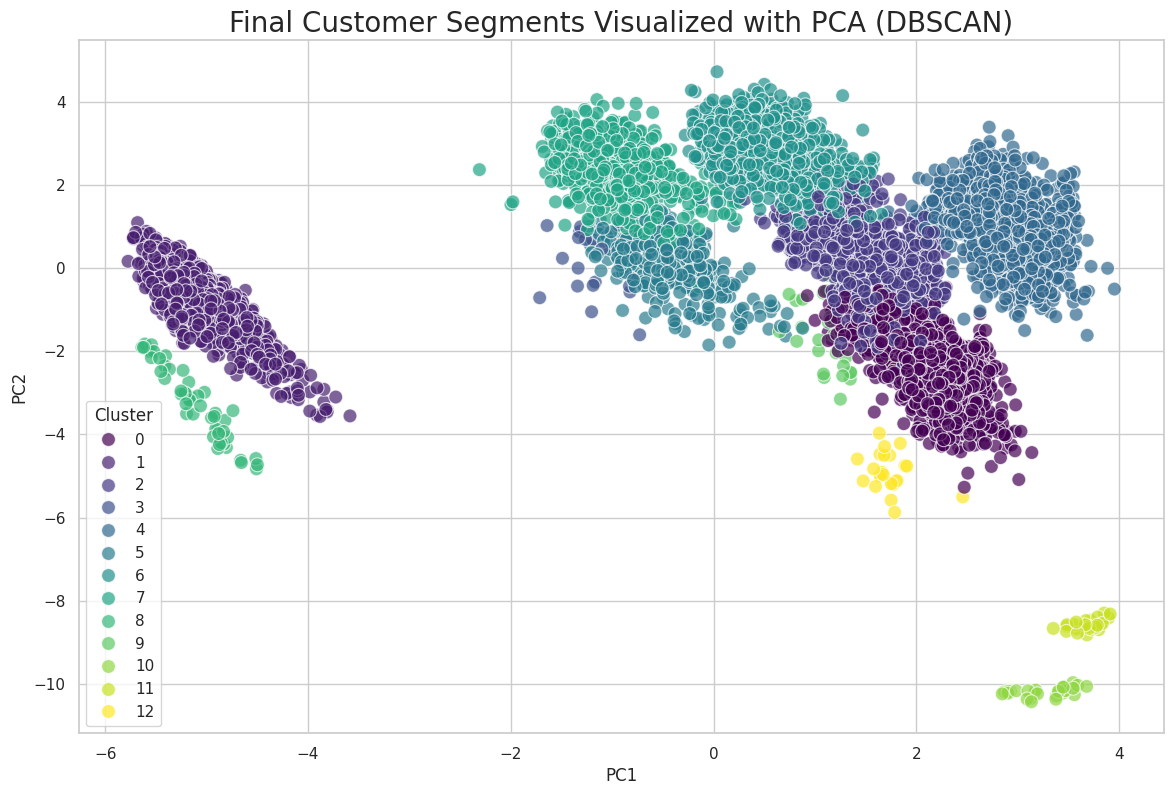

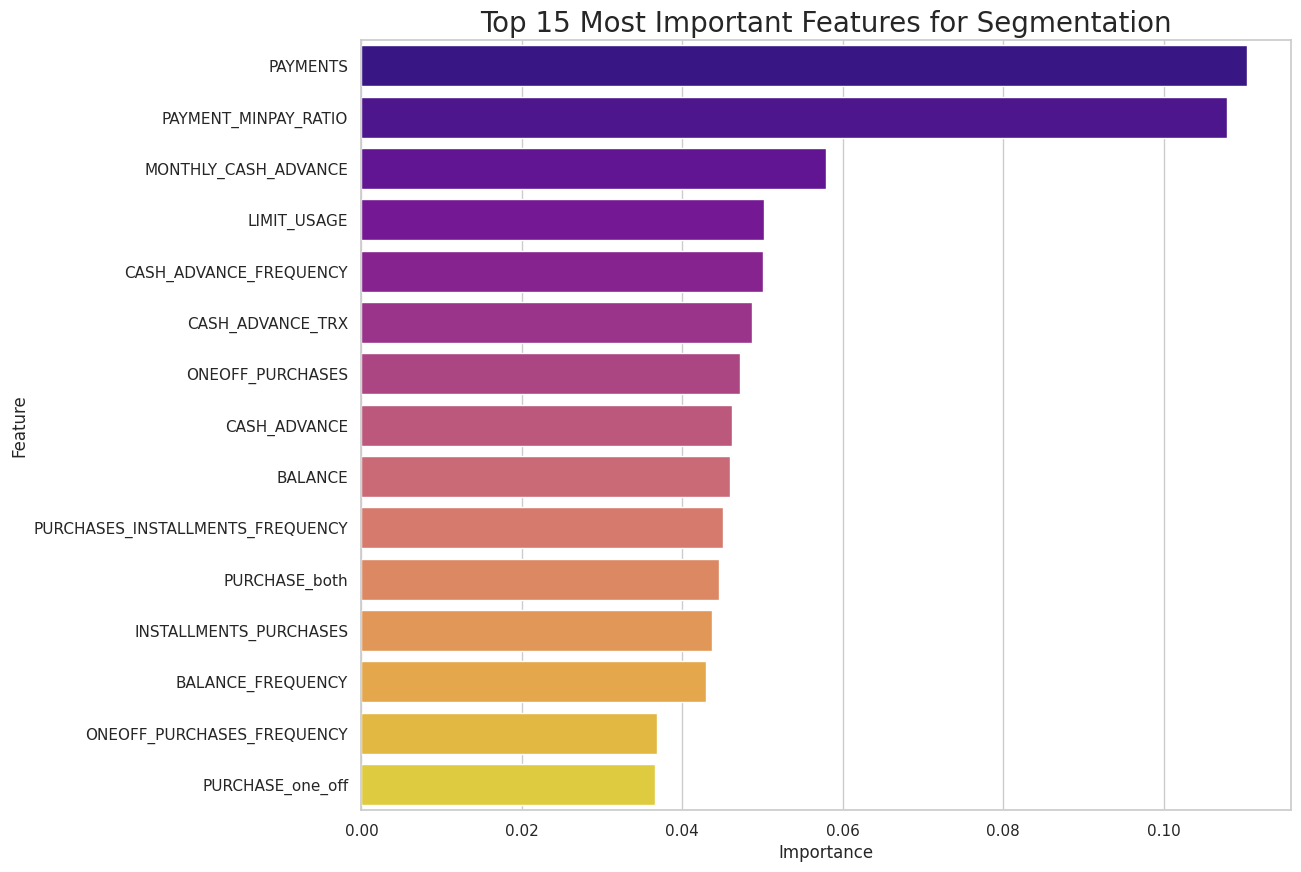

In [14]:
print("\n--- Starting Persona Analytics ---")

# Analyze the characteristics of each cluster using the original, unscaled data
# We group by our winning cluster labels and calculate the mean for each feature.
persona_analysis = df.groupby('Cluster').mean().T

print("\nMean Characteristics of Each Customer Segment:")
print(persona_analysis)

# --- Visualizing the Segments with PCA for a high-level overview ---
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = winning_labels

plt.figure(figsize=(14, 9))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df[pca_df['Cluster'] != -1], palette='viridis', s=100, alpha=0.7, legend='full')
plt.title('Final Customer Segments Visualized with PCA (DBSCAN)', fontsize=20)
plt.show()

# --- Feature Importance Analysis from our Classifier ---
importances = classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='plasma')
plt.title('Top 15 Most Important Features for Segmentation', fontsize=20)
plt.show()